# Advanced Statistics for Physics Analysis 2022-23
# Lab1 Assignment

## Feltrin Antonio, ID 2097126
## antonio.feltrin@studenti.unipd.it

In [1]:
library(ggplot2)
library(readr)
library(dplyr)
library(tidyr)
library(tibble)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Exercise 1 - American Airlines Employees

### 1.1 Read the data and import them in a ``data.frame`` or ``tibble`` structure

In [2]:
path_aa = "american_airline_empl.txt"
#this is a dataframe
df_aa = read.csv(path_aa, header=TRUE, sep = "\t", skip=0)
#this is a tibble
df_aa = read_tsv(path_aa, col_names=TRUE, skip=0)
df_aa <- df_aa %>% add_column(company="american", .before = "Full-time")
head(df_aa)

path_da = "delta_airline_empl.txt"
df_da = read_tsv(path_da, col_names=TRUE, skip=0)
df_da <- df_da %>% add_column(company="delta", .before = "Full-time")
head(df_da)

path_fe = "federal_express_empl.txt"
df_fe = read_tsv(path_fe, col_names=TRUE, skip=0)
df_fe <- df_fe%>% add_column(company="federal", .before = "Full-time")
head(df_fe)

path_ua = "united_airline_empl.txt"
df_ua = read_tsv(path_ua, col_names=TRUE, skip=0)
df_ua <- df_ua %>% add_column(company="united", .before = "Full-time")
head(df_ua)


Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Month,Year,company,Full-time,Part-time,Grand Total
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1990,american,68137,9039,77176
2,1990,american,68725,9273,77998
3,1990,american,69509,9376,78885
4,1990,american,69713,9326,79039
5,1990,american,70376,9309,79685
6,1990,american,71258,9369,80627


Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Month,Year,company,Full-time,Part-time,Grand Total
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1990,delta,56340,4226,60566
2,1990,delta,56413,4184,60597
3,1990,delta,56700,4117,60817
4,1990,delta,56630,4112,60742
5,1990,delta,56932,4156,61088
6,1990,delta,57478,4197,61675


Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Month,Year,company,Full-time,Part-time,Grand Total
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1990,federal,61305,23580,84885
2,1990,federal,61485,23520,85005
3,1990,federal,62244,22774,85018
4,1990,federal,63511,22917,86428
5,1990,federal,63044,23382,86426
6,1990,federal,64704,23246,87950


Rows: 397 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (2): Month, Year
num (3): Full-time, Part-time, Grand Total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Month,Year,company,Full-time,Part-time,Grand Total
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1990,united,65664,5457,71121
2,1990,united,65839,5446,71285
3,1990,united,66070,5445,71515
4,1990,united,66779,5518,72297
5,1990,united,67217,5675,72892
6,1990,united,67924,5978,73902


In [3]:
da_years <- df_da["Year"]
da_years <- as_tibble(da_years)
da_months <- df_da["Month"]
da_months <- as_tibble(da_months)

dacalendar <- list(rep(as.Date("2011-12-30"), dim(da_years)[1]))

for(p in 1:dim(da_years)[1]){
    yr0 <- as.character(da_years[[p,1]])
    mt0 <- as.character(format(da_months[[p,1]]*0.01, nsmall=2))
    mt0 <- substring(as.character(mt0),3,4)

    temp <- paste(yr0,mt0,"01",sep="-") #,"01"

    dacalendar[p] <- temp

}
print(dacalendar[1:5])

print(length(dacalendar))

#prepare for insertion in tibble
#mycalendar <- as_tibble(mycalendar)
dacalendar <- strptime(dacalendar, "%Y-%m-%d", tz="EST") #-%d
class(dacalendar)

df_aa <- df_aa %>% add_column(dacalendar, .before="Year")
df_da <- df_da %>% add_column(dacalendar, .before="Year")
df_fe <- df_fe %>% add_column(dacalendar, .before="Year")
df_ua <- df_ua %>% add_column(dacalendar, .before="Year")

#sort by date, just in case
df_da <- arrange(df_da,dacalendar)
head(df_aa)

[[1]]
[1] "1990-01-01"

[[2]]
[1] "1990-02-01"

[[3]]
[1] "1990-03-01"

[[4]]
[1] "1990-04-01"

[[5]]
[1] "1990-05-01"

[1] 397


[1] "POSIXlt" "POSIXt"

Month,dacalendar,Year,company,Full-time,Part-time,Grand Total
<dbl>,<dttm>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,1990-01-01,1990,american,68137,9039,77176
2,1990-02-01,1990,american,68725,9273,77998
3,1990-03-01,1990,american,69509,9376,78885
4,1990-04-01,1990,american,69713,9326,79039
5,1990-05-01,1990,american,70376,9309,79685
6,1990-06-01,1990,american,71258,9369,80627


### 1.2 Merge the four data tibble in a common ``tibble``

In [4]:
dfp <- bind_rows(df_aa,df_da,df_fe,df_ua)
dfp <- arrange(dfp, "Full-time")
dfp <- dfp[,!names(dfp) %in% c("Month", "Year")]

In [5]:
unique(factor(dfp$"company"))
colnames(dfp) <- c('dacalendar', 'company', 'Fulltime', 'Parttime', 'GrandTotal')
head(dfp)

[1] american delta    federal  united  
Levels: american delta federal united

dacalendar,company,Fulltime,Parttime,GrandTotal
<dttm>,<chr>,<dbl>,<dbl>,<dbl>
1990-01-01,american,68137,9039,77176
1990-02-01,american,68725,9273,77998
1990-03-01,american,69509,9376,78885
1990-04-01,american,69713,9326,79039
1990-05-01,american,70376,9309,79685
1990-06-01,american,71258,9369,80627


### 1.3 Produce a plot of the behaviour of the employees as a function of time for all four companies, separately for the number of full-time and part-time employees

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


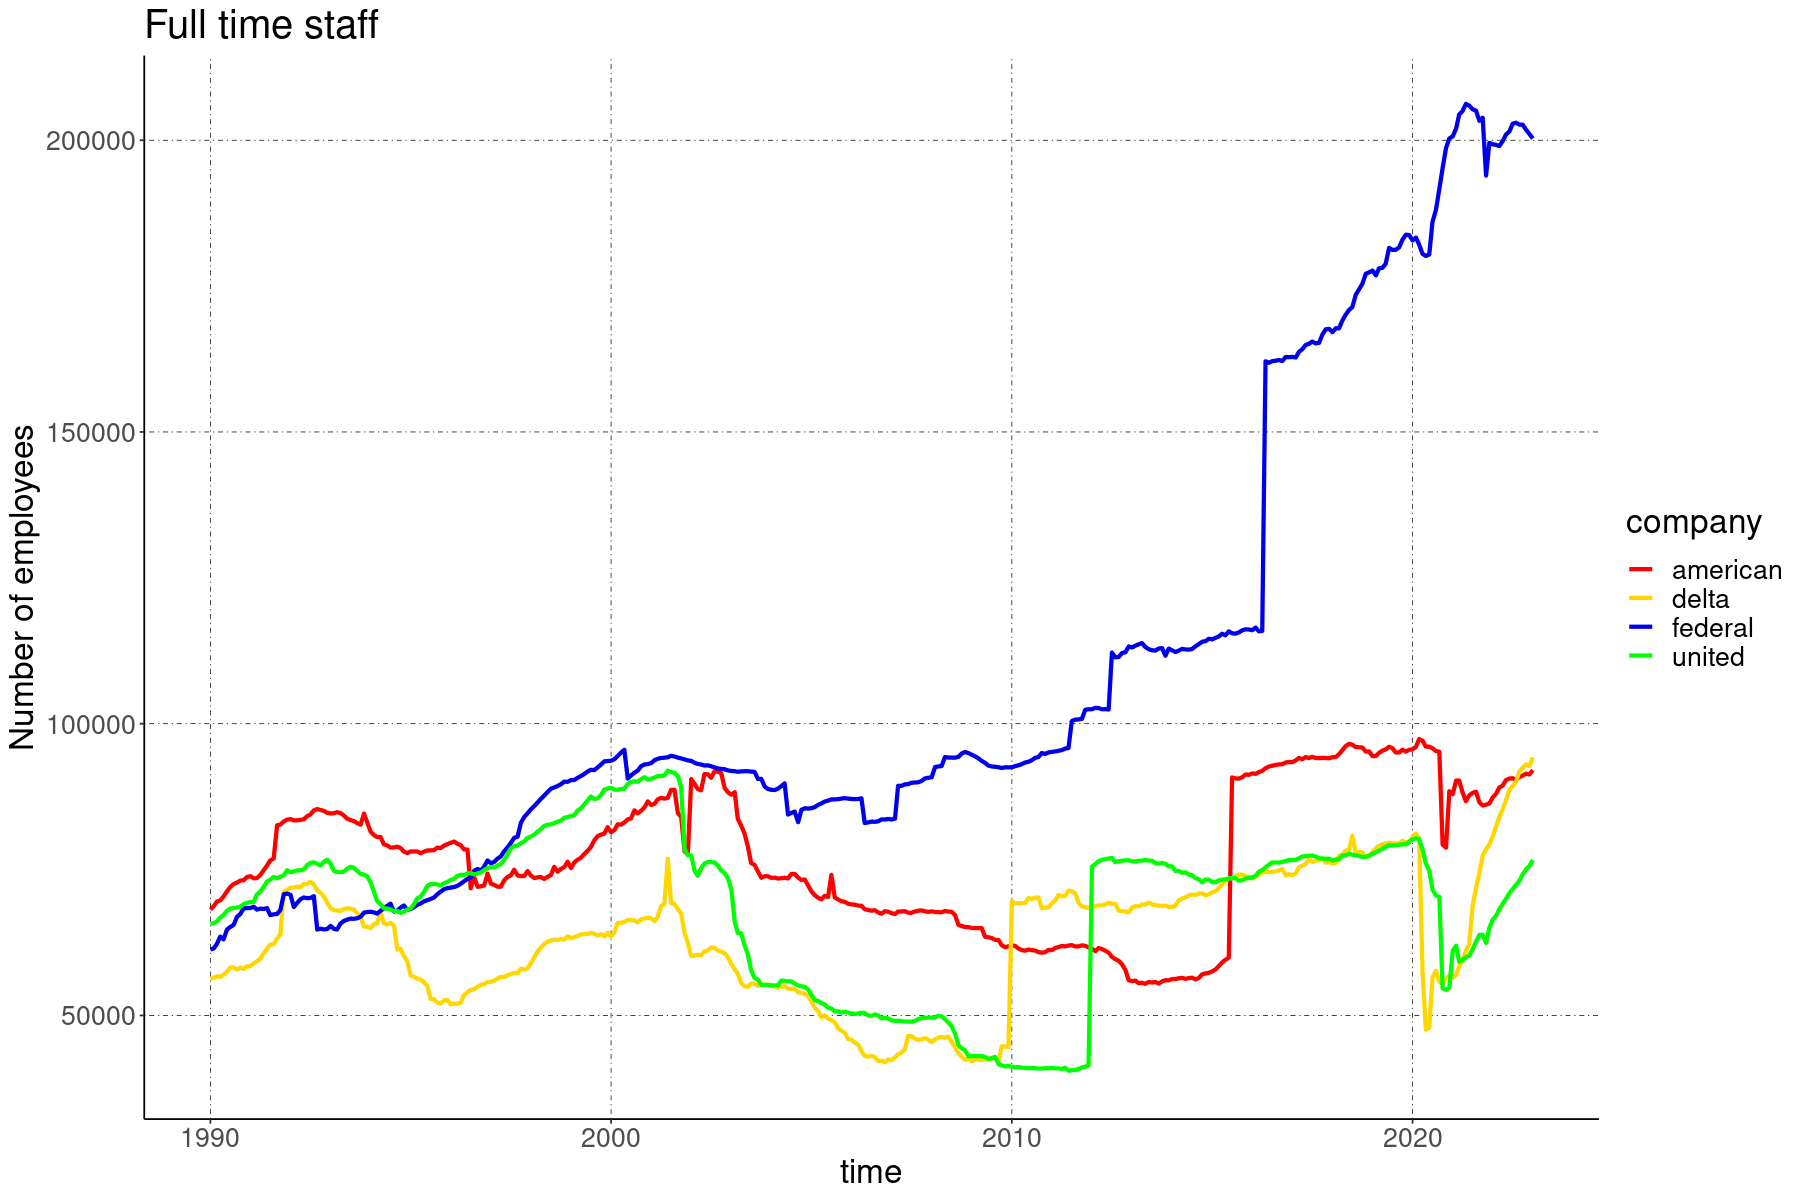

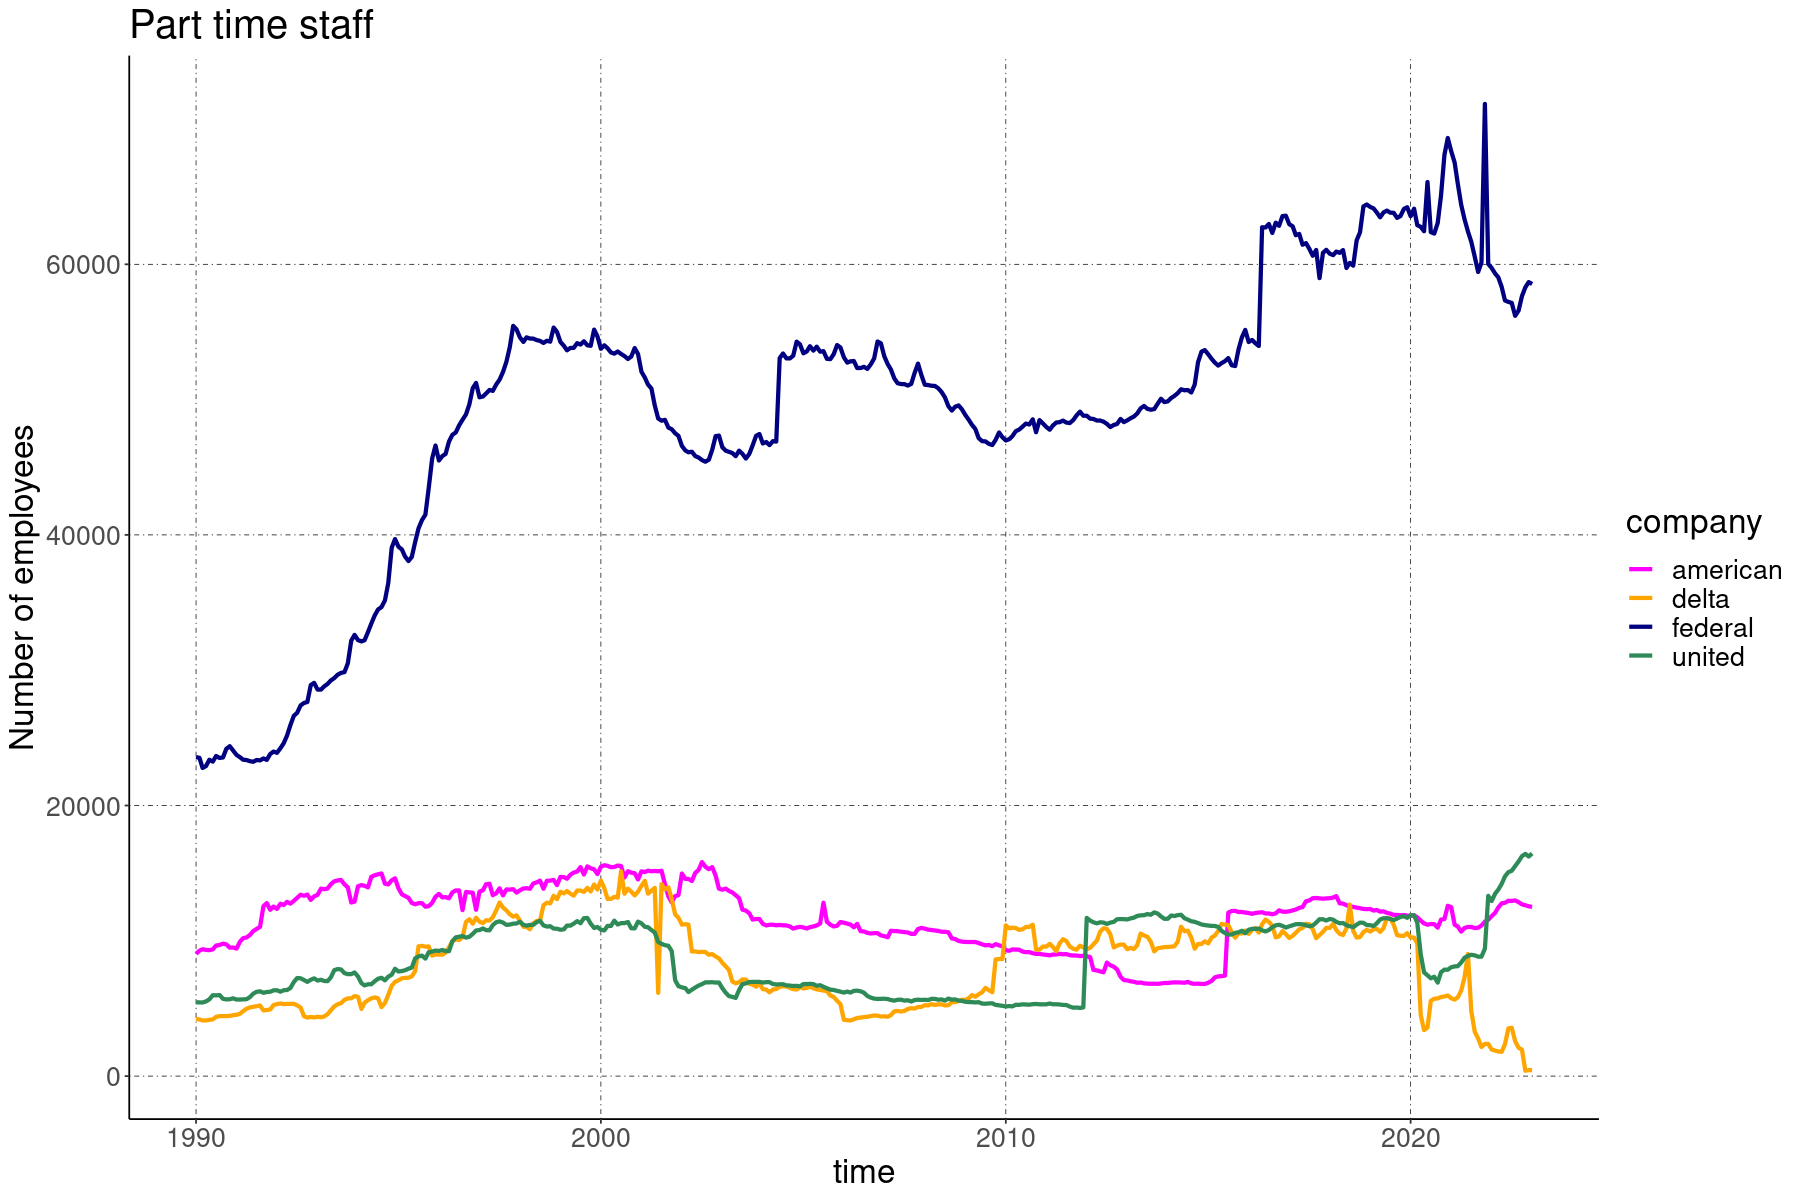

In [6]:
options(repr.plot.width=15, repr.plot.height=10)

fulltime_plot <- ggplot(data=dfp, aes(x=dacalendar, y=Fulltime, color=company)) +
        ggtitle("Full time staff") +
        scale_color_manual(name = "company", values = c('red','gold','blue2','green')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Number of employees") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

#trying different colors
parttime_plot <- ggplot(data=dfp, aes(x=dacalendar, y=Parttime, color=company)) +
        ggtitle("Part time staff") +
        scale_color_manual(name = "company", values = c('magenta','orange','navy','seagreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Number of employees") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

fulltime_plot
parttime_plot


### 1.4 When did each company reach the minimum and maximum number of employess ?

In [7]:
cat("max employees of aa = ",max(df_aa$"Grand Total"))
min(df_aa$"Grand Total")

maxplanes <- dfp %>% 
    group_by(company) %>% 
    filter(GrandTotal == max(GrandTotal))

minplanes <- dfp %>% 
    group_by(company) %>% 
    filter(GrandTotal == min(GrandTotal))

print("max no. of employees (full+part) time")
maxplanes
print("min no. of employees")
minplanes

max employees of aa =  109171

[1] 62290

[1] "max no. of employees (full+part) time"


dacalendar,company,Fulltime,Parttime,GrandTotal
<dttm>,<chr>,<dbl>,<dbl>,<dbl>
2018-06-01,american,96543,12628,109171
2023-01-01,delta,94236,439,94675
2021-03-01,federal,204406,65977,270383
2001-03-01,united,91041,11005,102046


[1] "min no. of employees"


dacalendar,company,Fulltime,Parttime,GrandTotal
<dttm>,<chr>,<dbl>,<dbl>,<dbl>
2013-09-01,american,55462,6828,62290
2006-11-01,delta,41948,4462,46410
1990-01-01,federal,61305,23580,84885
2011-06-01,united,40522,5259,45781


### 1.5 Plot the fraction of part-time worker over the total employess as a function of time
ez

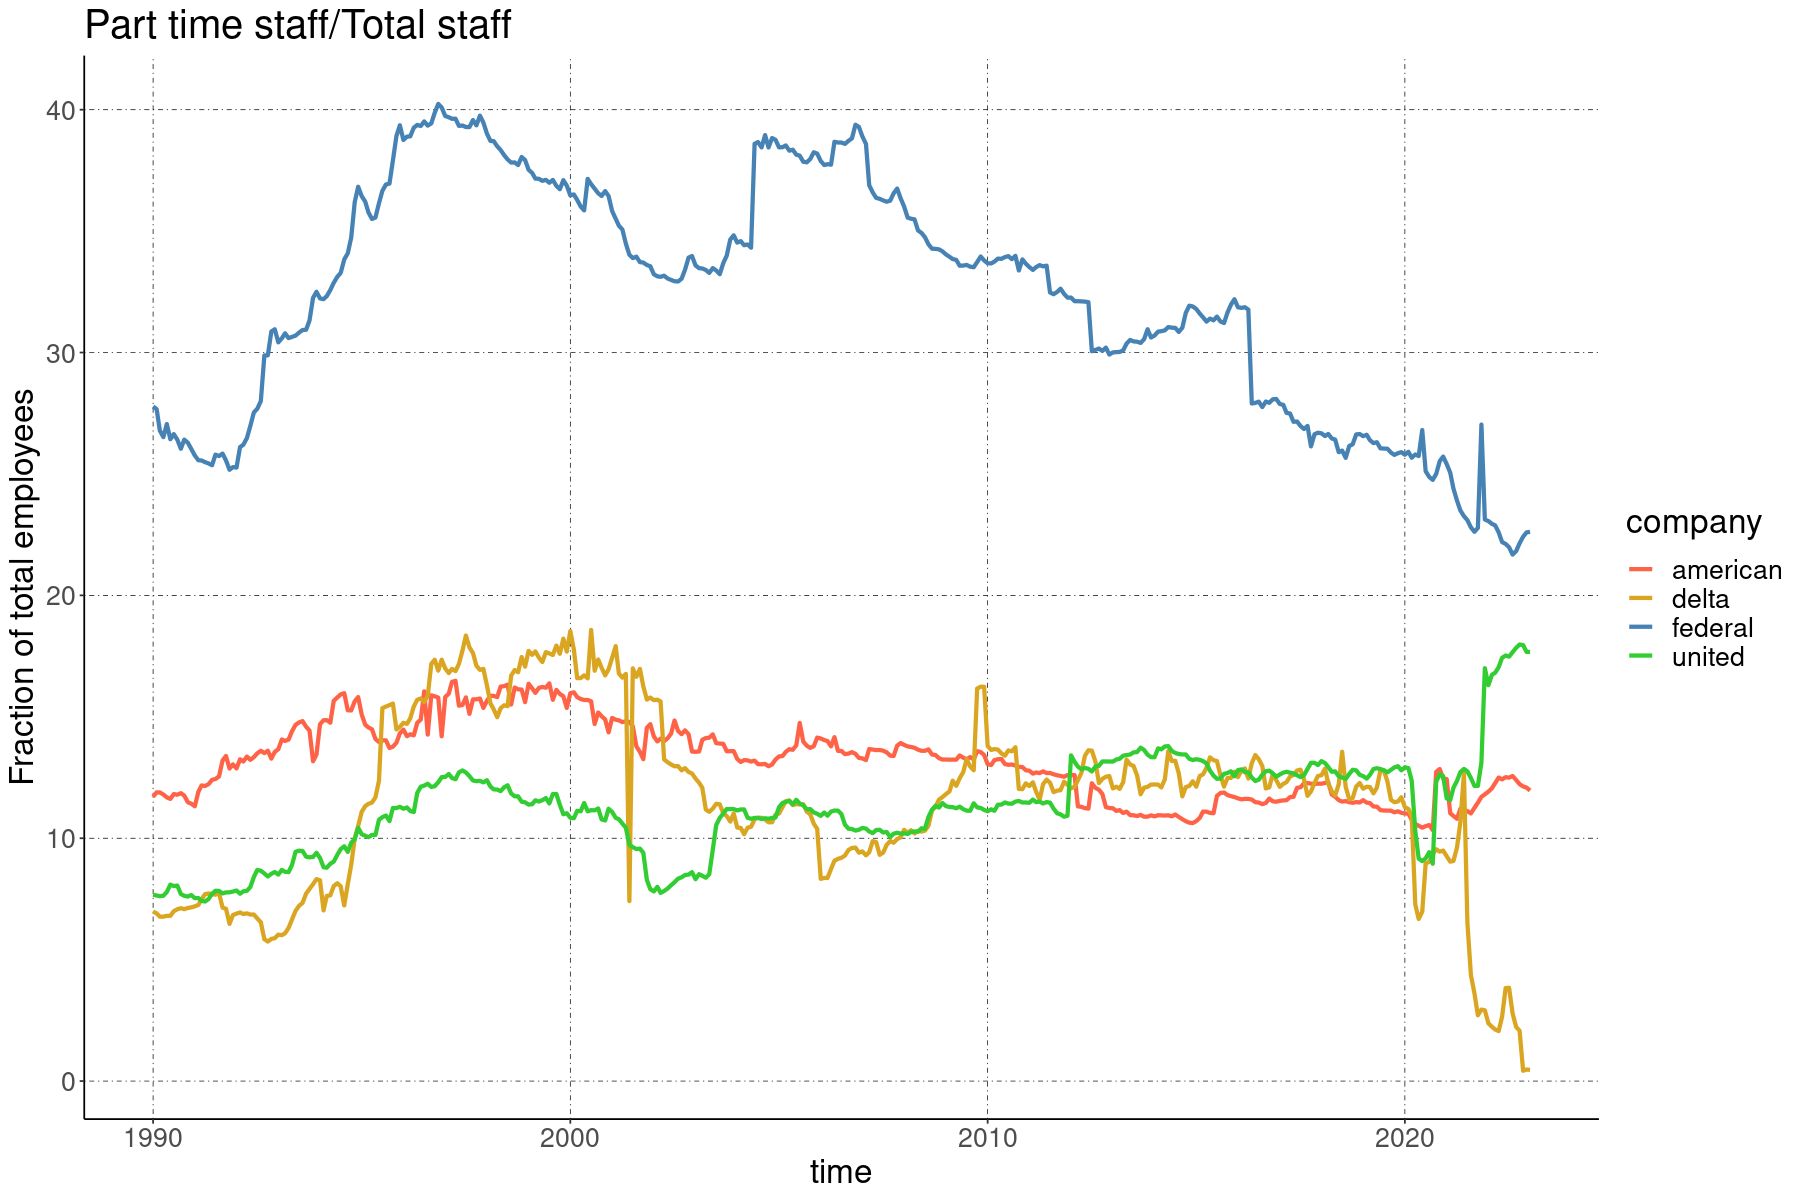

In [8]:
partfrac_plot <- ggplot(data=dfp, aes(x=dacalendar, y=100.*Parttime/GrandTotal, color=company)) +
        ggtitle("Part time staff/Total staff") +
        scale_color_manual(name = "company", values = c('tomato','goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Fraction of total employees") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

partfrac_plot

### 1.6 Did the COVID-19 pandemic have any influence in the employed workers of the airline companies?  Can you see a trend in the years 2019-2023 ?
Let's have a closer look at the previous plots by setting the time range as $[2019,2023]$.
From the plot below we can see that Covid-19 forced some layoffs, but lost staff was recovered in the following months. Federal reduced its staff over the years, but it remained the largest company. Some companies hired more full time, other more part-time employees. Delta and United adopted opposite strategies, with the former shifting its labor force composition towards a minimization of part-time employees. 

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 1392 rows containing missing values (`geom_line()`).”


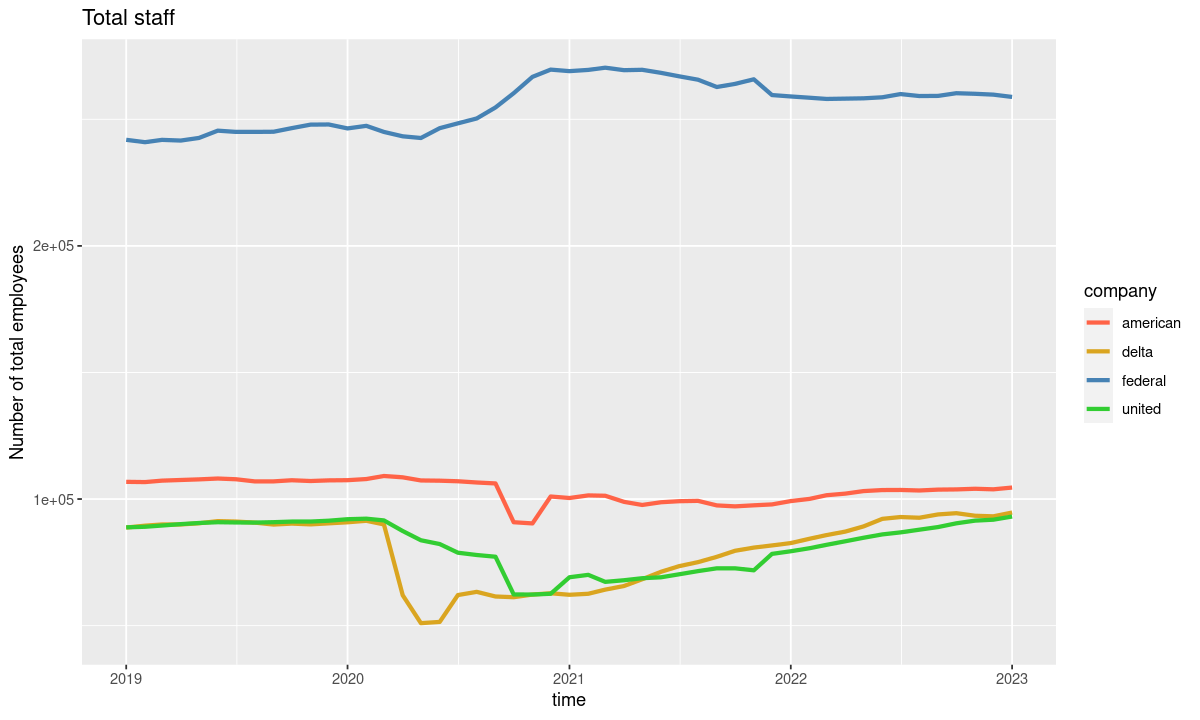

In [9]:
options(repr.plot.width=10, repr.plot.height=6)

dfp$dacalendar <- as.Date(dfp$dacalendar) 

partfrac_plot <- ggplot(data=dfp, aes(x=dacalendar, y=GrandTotal, color=company)) +
        ggtitle("Total staff") +
        scale_color_manual(name = "company", values = c('tomato','goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        labs(x = "time",y="Number of total employees") +
        xlim(as.Date(c('2019-01-01', '2023-01-01'), format="%Y-%m-%d") )
        theme(text = element_text(size = 20))

partfrac_plot

In [10]:
class(dfp$dacalendar)
dfp$dacalendar <- as.Date(dfp$dacalendar)
cfr = as.Date('2020-02-02')
class(cfr)
class(dfp$dacalendar)
#head(dfp)

[1] "Date"

[1] "Date"

[1] "Date"

# Exercise 2 - Data Frames and Tibble

### 2.1.1 Plot the total number of flights departed from each of the three NYC airports as a function of time(one entry for each of the 365 days of the year).

JFK = John F. Kennedy International Airport $\\$
EWR = Newark Liberty International Airport $\\$
LGA = LaGuardia Airport

In [11]:
library(nycflights13)

In [12]:
print("head(flights, 5)")
head(flights, 5)

[1] "head(flights, 5)"


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00


In [13]:
df_ori <- flights %>%
  group_by(month,day) %>%
  count(origin)

jfkalendar <- seq(as.Date('2013-1-1'), as.Date('2013-12-31'), by='1 day')
jfkalendar[1:5]

jfdays <- rep(jfkalendar,3)
for (p in 1:length(jfkalendar)){
    jfdays[3*p-2] <- jfkalendar[p]
    jfdays[3*p-1] <- jfkalendar[p]
    jfdays[3*p] <- jfkalendar[p]
}
typeof(jfdays[94])
jfdays <- strptime(jfdays, "%Y-%m-%d") #-%d
jfdays <- as.Date(jfdays)
class(jfdays[3])

df_ori <- df_ori %>% add_column(jfdays, .before = "month")

df_ori <- df_ori[,!names(df_ori) %in% c("month", "day")]
head(df_ori,10)


[1] "2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" "2013-01-05"

[1] "double"

[1] "Date"

jfdays,origin,n
<date>,<chr>,<int>
2013-01-01,EWR,305
2013-01-01,JFK,297
2013-01-01,LGA,240
2013-01-02,EWR,350
2013-01-02,JFK,321
2013-01-02,LGA,272
2013-01-03,EWR,336
2013-01-03,JFK,318
2013-01-03,LGA,260


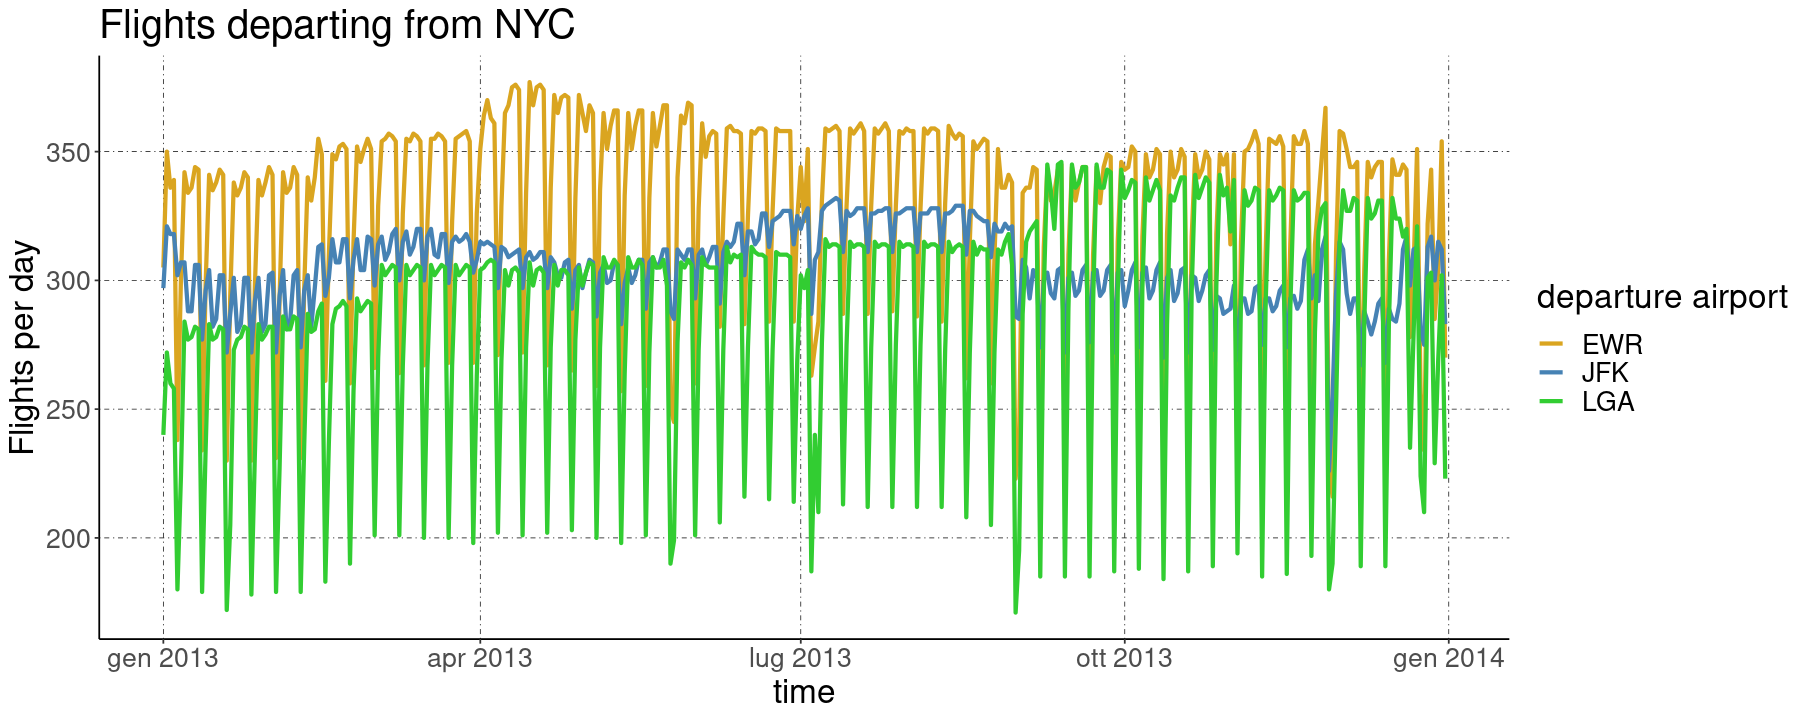

In [14]:
options(repr.plot.width=15, repr.plot.height=6)

fperday <- ggplot(data=df_ori, aes(x=jfdays, y=n, color=origin)) +
        ggtitle("Flights departing from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Flights per day") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

fperday

List of 2
 $ panel.grid.major:List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.2
  ..$ linetype     : chr "dash"
  ..$ lineend      : NULL
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ text            :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 915 rows containing missing values (`geom_line()`).”


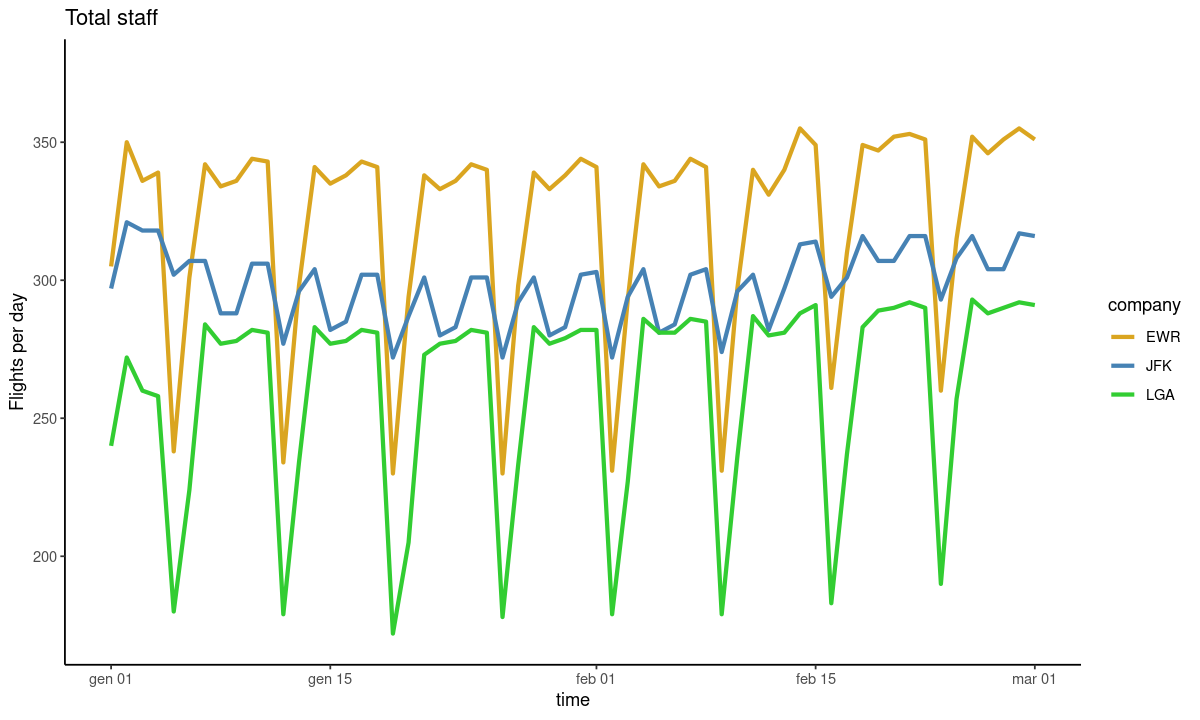

In [15]:
options(repr.plot.width=10, repr.plot.height=6)

starttime = '2013-01-01'
endtime = '2013-03-01' # last element

part_perday_plot <- ggplot(data=df_ori, aes(x=jfdays, y=n, color=origin)) +
        ggtitle("Total staff") +
        scale_color_manual(name = "company", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Flights per day") +
        xlim(as.Date(c(starttime, endtime), format="%Y-%m-%d") )
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 'dash')) +
        theme(text = element_text(size = 20))

part_perday_plot

As we can see zooming in, there clearly is a periodic pattern. We shall look into it in the next section.

### 2.1.2 Plot  the  average  number  of  flights  computed  over  the  first  five  working  days  of  each  week  as  afunction of the week number of the year.  Produce the same plot for the flights departing over theweekend (Saturdays and Sundays).

In [16]:
df_ori$weekday<- weekdays(df_ori$jfdays)
df_ori$week <- week(df_ori$jfdays)
df_ori0 = subset(df_ori,df_ori$weekday == "sabato" | df_ori$weekday == "domenica")
df_ori1 = subset(df_ori,df_ori$weekday != "sabato" & df_ori$weekday != "domenica")

In [17]:
doge <- df_ori0 %>%
mutate(year = year(jfdays), month = month(jfdays), week = week(jfdays)) %>%
unite("date", c("year", "month", "week"), sep ="-") %>%
group_by(date) %>%
summarise(mean_numflights = mean(n, na.rm = TRUE))

head(doge,7)

date,mean_numflights
<chr>,<dbl>
2013-1-1,258.6667
2013-1-2,253.0000
2013-1-3,243.3333
2013-1-4,250.5000
2013-10-40,267.3333
2013-10-41,263.0000
2013-10-42,266.5000


jfdays,origin,n,weekday,week,mean_f
<date>,<chr>,<int>,<chr>,<dbl>,<dbl>
2013-01-05,EWR,238,sabato,1,269.5
2013-01-05,JFK,302,sabato,1,304.5
2013-01-05,LGA,180,sabato,1,202.0
2013-01-06,EWR,301,domenica,1,269.5
2013-01-06,JFK,307,domenica,1,304.5
2013-01-06,LGA,224,domenica,1,202.0


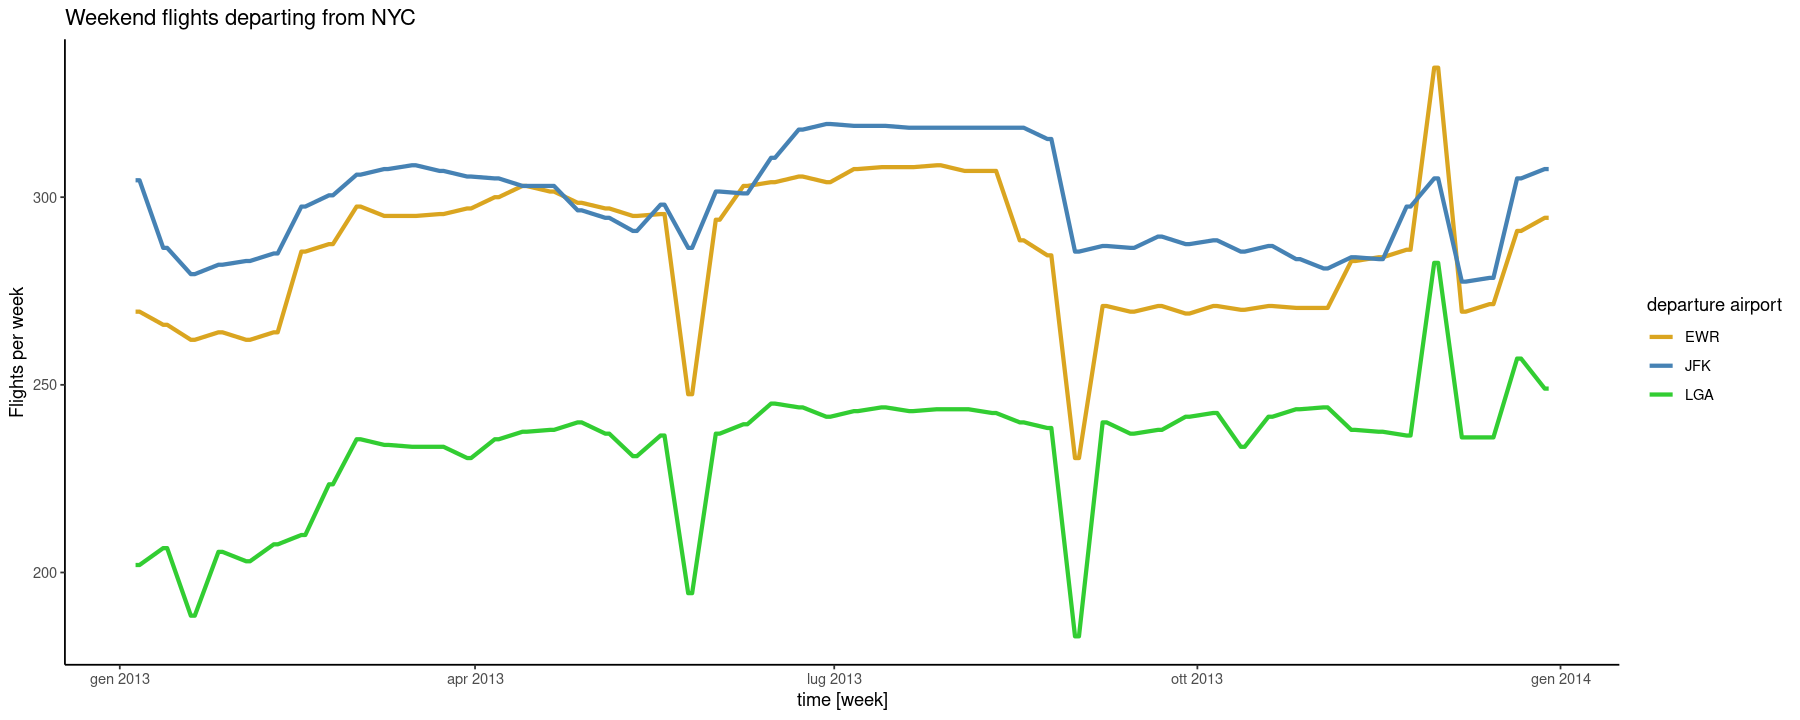

In [42]:
doge <- df_ori0 %>%
group_by(week,origin) %>%
mutate(mean_f = mean(n)) %>%
ungroup()

head(doge)

options(repr.plot.width=15, repr.plot.height=6)

end_plot <- ggplot(data=doge, aes(x=jfdays, y=mean_f, color=origin)) +
        ggtitle("Weekend flights departing from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time [week]",y="Flights per week") +
        theme(panel.grid = element_line(color = "#1e1f20",
                                  size = 5,
                                  linetype = 2))
        #theme(text = element_text(size = 20))

end_plot

jfdays,origin,n,weekday,week,mean_f
<date>,<chr>,<int>,<chr>,<dbl>,<dbl>
2013-01-01,EWR,305,martedì,1,334.4
2013-01-01,JFK,297,martedì,1,312.2
2013-01-01,LGA,240,martedì,1,262.8
2013-01-02,EWR,350,mercoledì,1,334.4
2013-01-02,JFK,321,mercoledì,1,312.2
2013-01-02,LGA,272,mercoledì,1,262.8


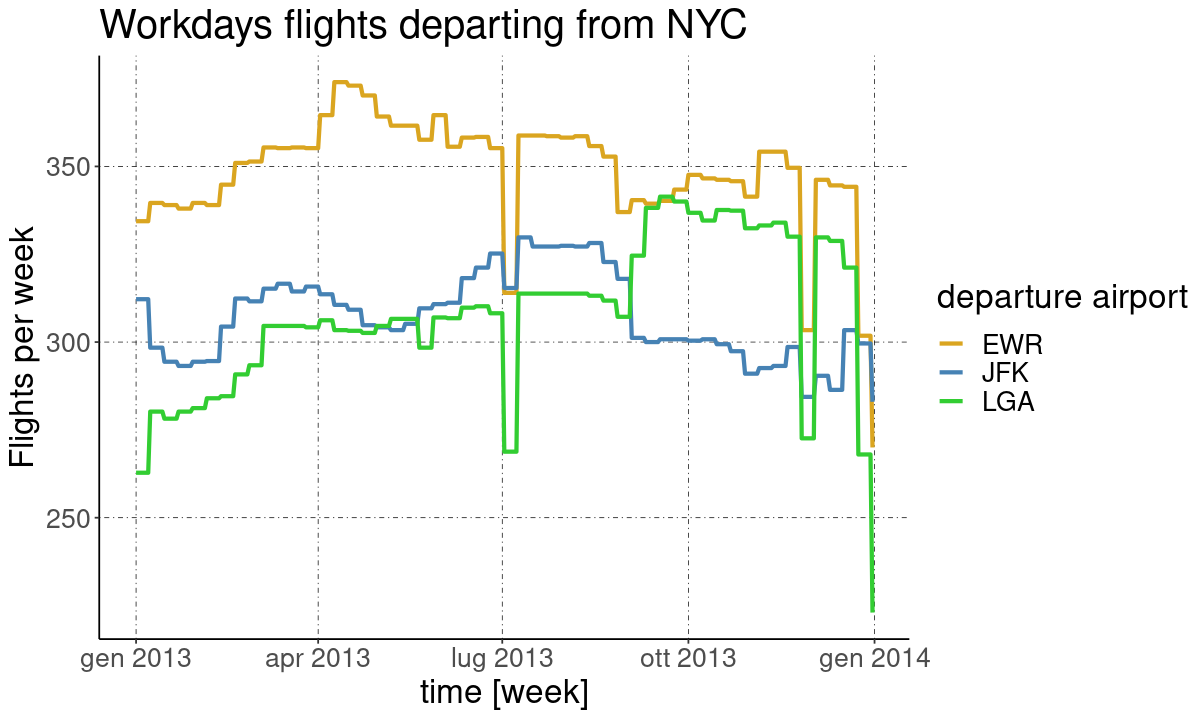

In [35]:
doge <- df_ori1 %>%
group_by(week,origin) %>%
mutate(mean_f = mean(n)) %>%
ungroup()

head(doge)

end_plot <- ggplot(data=doge, aes(x=jfdays, y=mean_f, color=origin)) +
        ggtitle("Workdays flights departing from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time [week]",y="Flights per week") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

end_plot

### 2.2.1 For each flight in the data frame, compute the departure delay and extract the following pieces of information (separately for each NYC airport): 
-  min, max and average delay for each day of the year (show the data in corresponding plots)

In [20]:
#head(flights,6)
dfdel <- flights %>%
group_by(month,day,origin) %>%
mutate(mean_del = mean(dep_delay)) %>%
ungroup()

df_ori2 <- flights %>%
  group_by(month,day,origin) %>%
  summarise(mean_del=mean(dep_delay,na.rm=TRUE), min_del=min(dep_delay,na.rm=TRUE),max_del=max(dep_delay,na.rm=TRUE),n=n())


df_ori2 <- df_ori2 %>% add_column(jfdays, .before = "month")
df_ori2 <- df_ori2[,!names(df_ori2) %in% c("month", "day")]
head(df_ori2,10)

`summarise()` has grouped output by 'month', 'day'. You can override using the
`.groups` argument.


jfdays,origin,mean_del,min_del,max_del,n
<date>,<chr>,<dbl>,<dbl>,<dbl>,<int>
2013-01-01,EWR,17.483553,-13,379,305
2013-01-01,JFK,12.219595,-12,853,297
2013-01-01,LGA,3.134454,-15,134,240
2013-01-02,EWR,25.322674,-11,334,350
2013-01-02,JFK,8.143750,-13,337,321
2013-01-02,LGA,6.055351,-13,379,272
2013-01-03,EWR,8.450450,-13,174,336
2013-01-03,JFK,13.814465,-12,291,318
2013-01-03,LGA,10.774704,-12,252,260


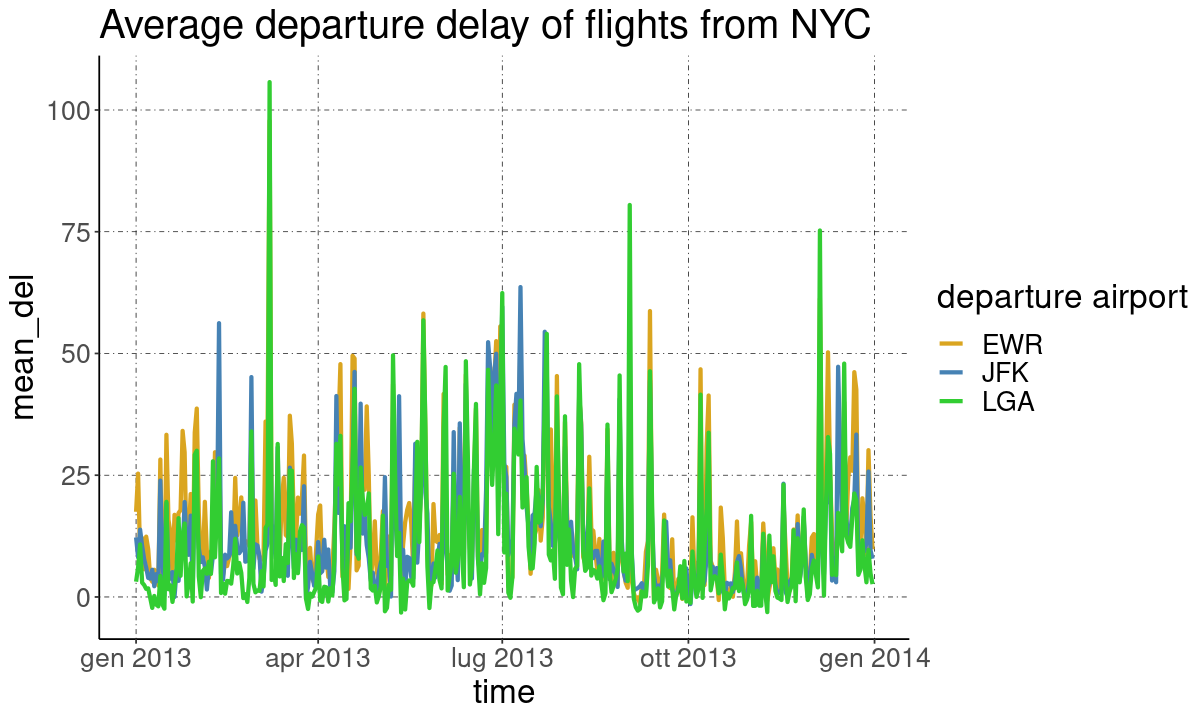

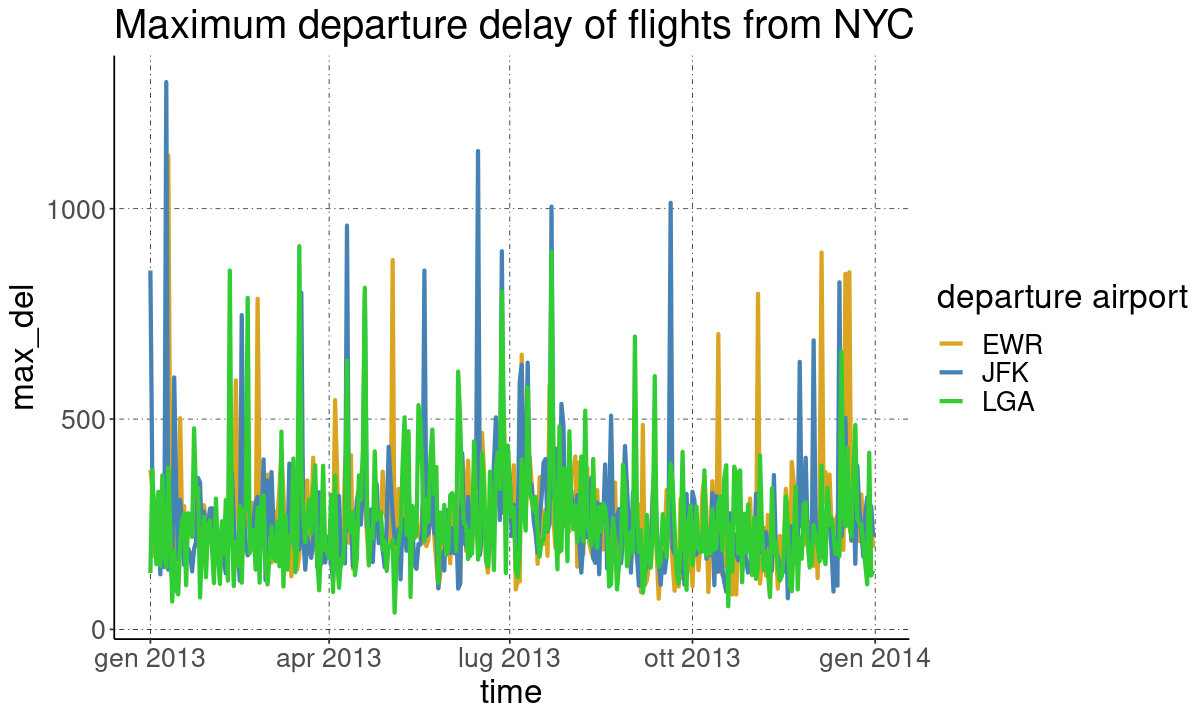

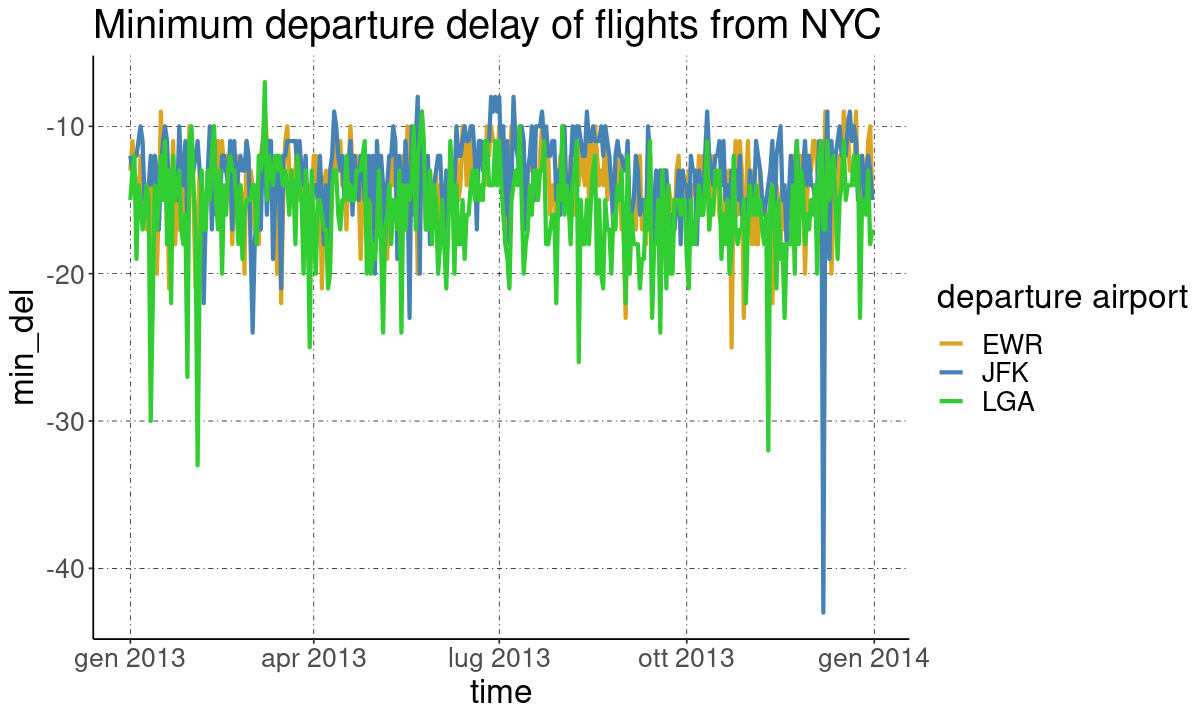

In [21]:
meandel_plot <- ggplot(data=df_ori2, aes(x=jfdays, y=mean_del, color=origin)) +
        ggtitle("Average departure delay of flights from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="mean_del") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

meandel_plot

maxdel_plot  <- ggplot(data=df_ori2, aes(x=jfdays, y=max_del, color=origin)) +
        ggtitle("Maximum departure delay of flights from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="max_del") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

maxdel_plot

mindel_plot  <- ggplot(data=df_ori2, aes(x=jfdays, y=min_del, color=origin)) +
        ggtitle("Minimum departure delay of flights from NYC") +
        scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="min_del") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

mindel_plot

### 2.3 Assuming the distance flew by the plane is, at first approximation, the distance between the two connecting airports (as given in the data frame), compute the average speed of each plane. Produce a plot of the average plane speed as a function of departure day of the year.
distance is obviously in miles $\\$
speed = (distance*1.609)/(airtime) $\\$
I used ``airtime`` instead of ``hour``+``minute``/60 because the latter includes ground maneuvres (take-off, landing, taxiing).

In [22]:
df_ori4 <- summarise(group_by(flights, tailnum),n = n())
cat('There are',nrow(df_ori4),'different airplanes')

dfspeed <- flights
dfspeed$speed <- (dfspeed$distance*1.609)/(dfspeed$air_time/60)

dfspeed <- dfspeed %>%
  group_by(month,day) %>%
  summarise(mean_speed=mean(speed,na.rm=TRUE),n=n())

dfspeed <- dfspeed %>% add_column(jfkalendar, .before = "month")
dfspeed <- dfspeed[,!names(dfspeed) %in% c("month", "day", "year")]

head(dfspeed)

There are 4044 different airplanes

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


jfkalendar,mean_speed,n
<date>,<dbl>,<int>
2013-01-01,575.0771,842
2013-01-02,587.5402,943
2013-01-03,594.9819,914
2013-01-04,616.8570,915
2013-01-05,604.2606,720
2013-01-06,593.3873,832


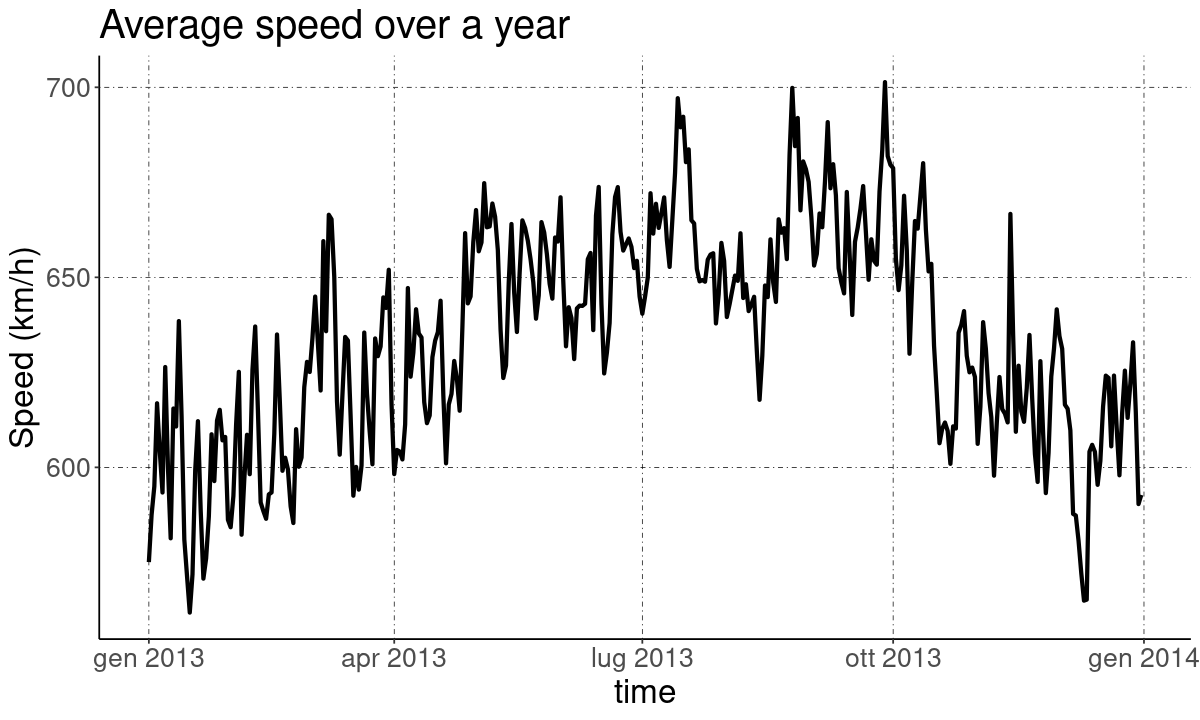

In [23]:
speed_plot <- ggplot(data=dfspeed, aes(x=jfkalendar, y=mean_speed)) +
        ggtitle("Average speed over a year") +
        #scale_color_manual(name = "departure airport", values = 'goldenrod') +
        geom_line(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Speed (km/h)") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

speed_plot

There is a significant difference between the summer and winter months, so speed could be related to weather. However, flights go/come from far away destinations, so there could be more factors in play.

### Analyze the flights offered by each airline company and determine:
-  the airline companies offering the largest two numbers of flights per day and per week;
-  the airline company offering the smallest number of flight per month;
-  the airline company offering the longest distance flight per month.


you can produce plots, if you like, to visualize the results of the analysis

company = carrier, among the following:

In [24]:
airlines

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


In [25]:
# 2.4.1 I create a dataframe with flights per carrier per day
dfoffer <- flights

dfoffer <- dfoffer %>%
group_by(month,day,carrier) %>%
summarise(nflights = n())

cat('number of different companies =', nrow(summarise(group_by(flights,carrier) ,nflights=n()))  )

head(dfoffer)

`summarise()` has grouped output by 'month', 'day'. You can override using the
`.groups` argument.


number of different companies = 16

month,day,carrier,nflights
<int>,<int>,<chr>,<int>
1,1,9E,28
1,1,AA,94
1,1,AS,2
1,1,B6,163
1,1,DL,112
1,1,EV,116


In [26]:
#2.4.2
#now let's order per day and select top 2 / bottom 1

dfofferTop <- dfoffer %>%
    group_by(month,day) %>%
    arrange(desc(nflights)) %>% 
    slice(1:2)

dfofferBot <- dfoffer %>%
    group_by(month,day) %>%
    arrange(desc(nflights)) %>% 
    slice_tail(n=1)

jfday2 <- rep(jfkalendar,2)
for (p in 1:length(jfkalendar)){
    jfday2[2*p-1] <- jfkalendar[p]
    jfday2[2*p] <- jfkalendar[p]
}
head(dfofferBot,7)

month,day,carrier,nflights
<int>,<int>,<chr>,<int>
1,1,HA,1
1,2,HA,1
1,3,HA,1
1,4,HA,1
1,5,HA,1
1,6,YV,1
1,7,HA,1


To be fair, I'm not considering ex aequo (HA has only 1 flight on Jan 6 but gets replaced by YV)

In [27]:
dfofferTop <- dfofferTop %>% add_column(jfday2, .before = "month")
dfofferTop <- dfofferTop[,!names(dfofferTop) %in% c("month", "day")]

dfofferBot <- dfofferBot %>% add_column(jfkalendar, .before = "month")
dfofferBot <- dfofferBot[,!names(dfofferBot) %in% c("month", "day")]

cat('The number of different companies who appear in a day top2 is =', 
    nrow(summarise(group_by(dfofferTop,carrier) ,n=n())),':',
    summarise(group_by(dfofferTop,carrier) ,n=n())$carrier,'\n')

cat('The number of different companies who appear in a day bottom count is =', 
    nrow(summarise(group_by(dfofferBot,carrier) ,n=n())),':',
    summarise(group_by(dfofferBot,carrier) ,n=n())$carrier)

head(dfofferTop,7)
head(dfofferBot,7)

The number of different companies who appear in a day top2 is = 4 : B6 DL EV UA 
The number of different companies who appear in a day bottom count is = 5 : AS F9 HA OO YV

jfday2,carrier,nflights
<date>,<chr>,<int>
2013-01-01,UA,165
2013-01-01,B6,163
2013-01-02,UA,170
2013-01-02,B6,162
2013-01-03,B6,162
2013-01-03,UA,159
2013-01-04,B6,161


jfkalendar,carrier,nflights
<date>,<chr>,<int>
2013-01-01,HA,1
2013-01-02,HA,1
2013-01-03,HA,1
2013-01-04,HA,1
2013-01-05,HA,1
2013-01-06,YV,1
2013-01-07,HA,1


In [28]:
dfofferBot %>%
    group_by(carrier) %>% 
    count()

dfofferTop %>%
    group_by(carrier) %>% 
    count()

carrier,n
<chr>,<int>
AS,3
F9,5
HA,245
OO,11
YV,101


carrier,n
<chr>,<int>
B6,165
DL,4
EV,203
UA,358


So Hawaiian Airlines consistently ranks as the company with the lowest flights offered per day. It makes sense, since NYC-Hawaii is a ~8000km trip (distance = 4983 miles). We also see that HA ranks no.1 as max distance covered.

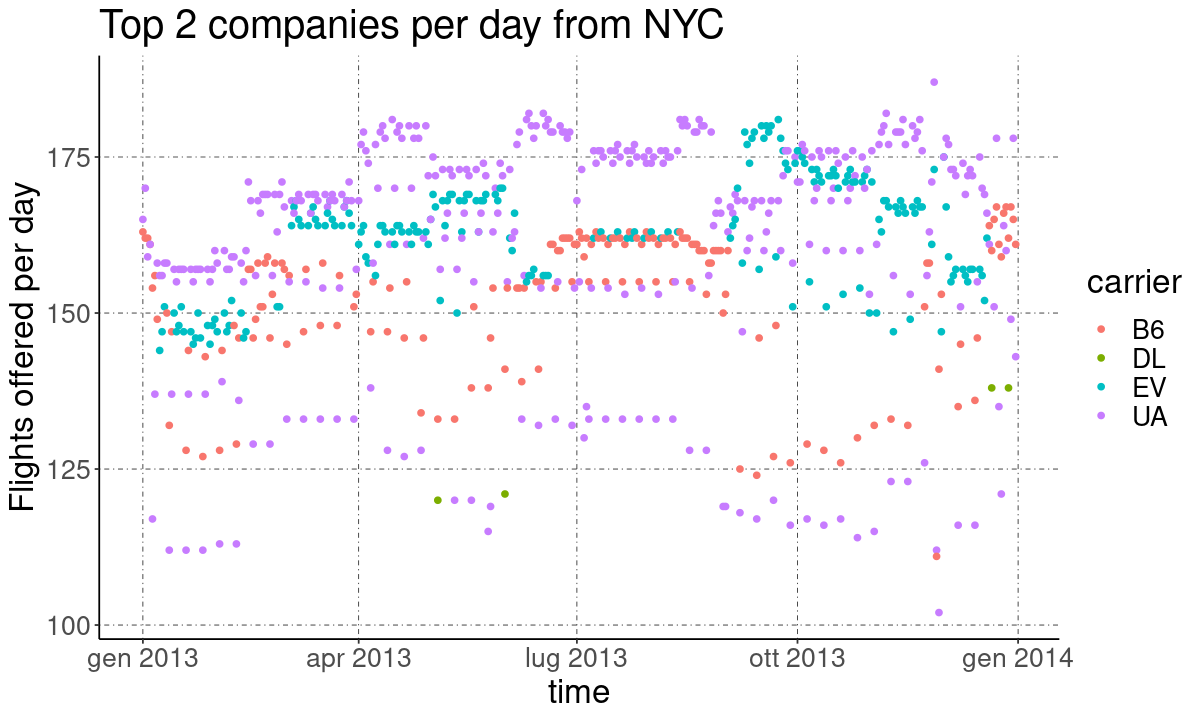

In [29]:
Topcarr_plot  <- ggplot(data=dfofferTop, aes(x=jfday2, y=nflights, color=carrier)) +
        ggtitle("Top 2 companies per day from NYC") +
        #scale_color_manual(name = "departure airport", values = c('goldenrod','steelblue','limegreen')) +
        geom_point()+#(linewidth=1.2) +
        theme_classic() +
        labs(x = "time",y="Flights offered per day") +
        theme(panel.grid.major = element_line(color = "black",
                                              size = 0.2, 
                                              linetype = 10)) +
        theme(text = element_text(size = 20))

Topcarr_plot

`summarise()` has grouped output by 'week'. You can override using the
`.groups` argument.


carrier,n
<chr>,<int>
B6,31
EV,22
UA,53


The number of different companies who appear in a week top count is = 3 : B6 EV UA

week,carrier,nperweek
<dbl>,<chr>,<int>
1,B6,1107
1,UA,1067
2,UA,1034
2,B6,993
3,UA,1032
3,B6,968


$x
[1] "time [week]"

$y
[1] "Flights offered per week"

attr(,"class")
[1] "labels"

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 40
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


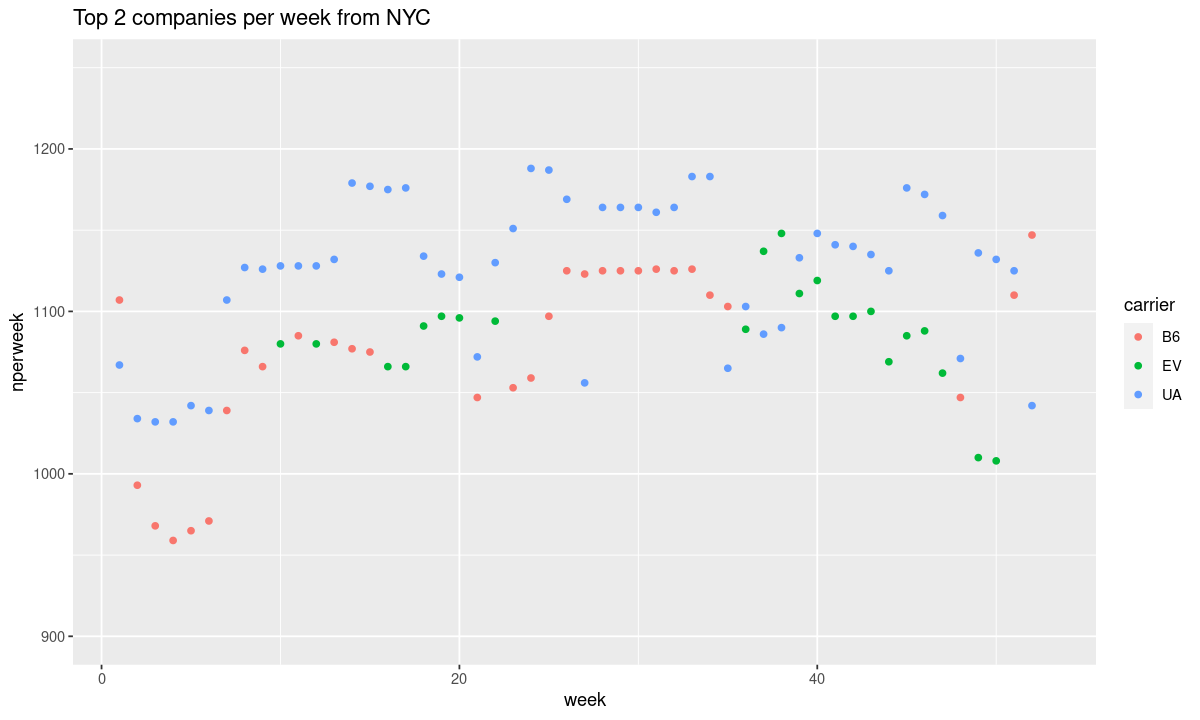

In [30]:
#2.4.1b top 2 per week

dfofweek <- dfoffer %>%
unite("week", c("month", "day"), sep ="-") 

dfofweek$week <- week(paste('2013-',dfofweek$week))

dfofweek <- dfofweek %>%
    group_by(week,carrier) %>%
    summarise(nperweek = sum(nflights))

dfWeekTop <- dfofweek %>%
    group_by(week) %>%
    arrange(desc(nperweek)) %>% 
    slice(1:2)

dfWeekTop %>%
    group_by(carrier) %>%
    count()

cat('The number of different companies who appear in a week top count is =', 
    nrow(summarise(group_by(dfWeekTop,carrier) ,n=n())),':',
    summarise(group_by(dfWeekTop,carrier) ,n=n())$carrier)


head(dfWeekTop)

Topweek_plot  <- ggplot(data=dfWeekTop, aes(x=week, y=nperweek, color=carrier)) +
        ggtitle("Top 2 companies per week from NYC") +
        geom_point() +
        ylim(900,1250)
        labs(x = "time [week]",y="Flights offered per week") #+
        #theme(panel.grid.major = element_line(color = "black",
        #                                      size = 0.2, 
        #                                      linetype = 10)) +
        theme(text = element_text(size = 40))

Topweek_plot

In [31]:
# 2.4.3

maxdist <- flights %>% 
    group_by(month,day) %>% 
    filter(distance == max(distance))
maxdist <- maxdist %>% add_column(jfkalendar, .before = "month")
maxdist <- maxdist[,!names(maxdist) %in% c("month", "day", "year")]

head(maxdist)
nrow(maxdist)

jfkalendar,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<date>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013-01-01,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013-01-02,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013-01-03,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013-01-04,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013-01-05,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013-01-06,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


[1] 365

In [32]:
maxdist %>% 
    group_by(carrier) %>% 
    count()

carrier,n
<chr>,<int>
HA,342
UA,23


As written above, HA often offers the longest trip of the day. The only rival is United Airlines, which is a big company that offers a lot of flights, so it makes sense that a few of them are very long. 